# Student Performance Indicator
## Life cycle of Machine learning Project
    Understanding the Problem Statement
    Data Collection
    Data Checks to perform
    Exploratory data analysis
    Data Pre-Processing
    Model Training
    Choose best model


### 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
#reading the dataset
data=pd.read_csv("data/stud.csv")

In [4]:
#viewing first 5 rows of the data
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#checking the shape of data
data.shape

(1000, 8)

In [6]:
#checking the data  set features in detail
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
#checking the statistcial summary of the data
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


    There are three numerical features,means are very close to each other-btn 66-69
    The standard deviations as close to each other-btn 14.6-15.19
    min score is 0 for maths only.

In [8]:
#checking the missing values
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values


In [9]:
#checking the duplicates
data.duplicated().sum()

0

There are no duplicates


In [10]:
#checking the data types
data.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [11]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
#checking the unique values in each column
for i in data:
    print(i)
    print(data[i].unique())
    print("\n")

gender
['female' 'male']


race_ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']


parental_level_of_education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


lunch
['standard' 'free/reduced']


test_preparation_course
['none' 'completed']


math_score
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]


reading_score
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]


writing_score
[ 74  88  93  4

In [13]:
#defining the categorical and numerical features
numeric_features=  [i for i in data.columns if data[i].dtype!='O']
categorical_features=[i for i in data.columns if data[i].dtype=='O']

#printing the columns
print('The numeric features are  : {}'.format(numeric_features))
print('The categorical features are  :{}'.format(categorical_features))

The numeric features are  : ['math_score', 'reading_score', 'writing_score']
The categorical features are  :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
#adding column for total score and average score for student.
data['total_score']=data['math_score']+data['reading_score']+data['writing_score']
data['average_score']=data['total_score']/3
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
#no of students with full marks in reading score
data[data['reading_score']==100]['average_score'].count()

17

In [16]:
#no of students with full marks in writing score 
data[data['writing_score']==100]['average_score'].count()

14

In [17]:
#no of students with full marks in maths
data[data['math_score']==100]['average_score'].count()

7

In [18]:
#students who socred marks less than 20 in each
reading_20=data[data['reading_score']<=20]['average_score'].count()
writing_20=data[data['writing_score']<=20]['average_score'].count()
maths_20=data[data['math_score']<=20]['average_score'].count()

print('No of students who scored less than 20 in reading ={0}'.format(reading_20))
print('No of students who scored less than 20 in writing ={0}'.format(writing_20))
print('No of students who scored less than 20 in maths ={0}'.format(maths_20))

No of students who scored less than 20 in reading =1
No of students who scored less than 20 in writing =3
No of students who scored less than 20 in maths =4


it shows that students performed badly in maths compared to other two .

# Visualization


<Axes: title={'center': 'Histogram of average scores'}, xlabel='average_score', ylabel='Count'>

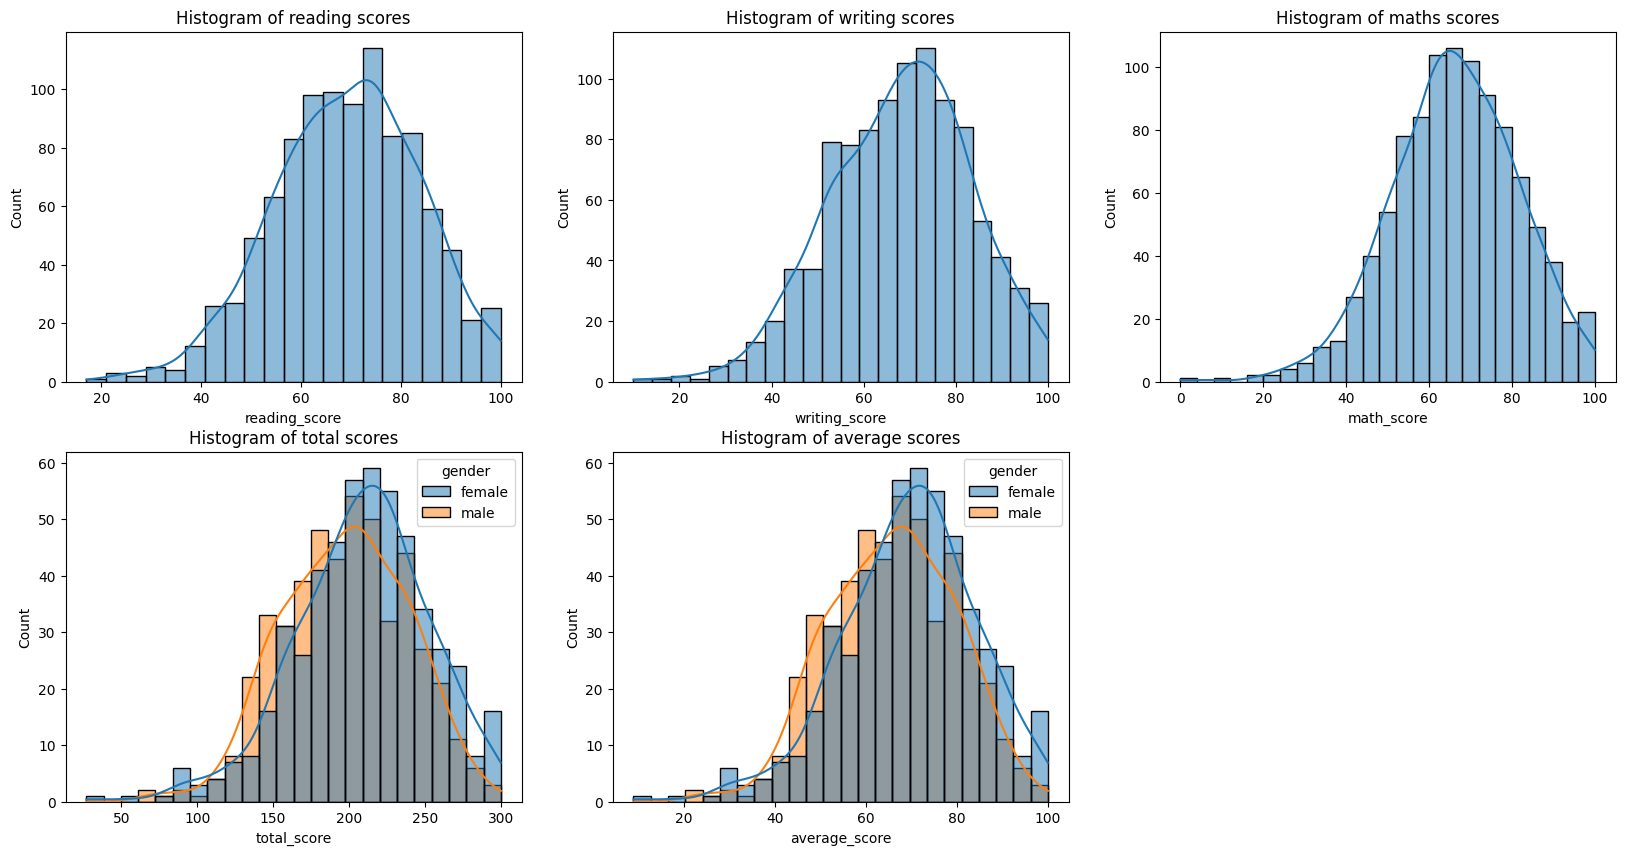

In [19]:
#visualising the average score distributions
#histograms
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.title('Histogram of reading scores')
sns.histplot(data=data,x=data['reading_score'],kde=True)

plt.subplot(2,3,2)
plt.title('Histogram of writing scores')
sns.histplot(data=data,x=data['writing_score'],kde=True)

plt.subplot(2,3,3)
plt.title('Histogram of maths scores')
sns.histplot(data=data,x=data['math_score'],kde=True)

plt.subplot(2,3,4)
plt.title('Histogram of total scores')
sns.histplot(data=data,x=data['total_score'],kde=True,hue='gender')

plt.subplot(2,3,5)
plt.title('Histogram of average scores')
sns.histplot(data=data,x=data['average_score'],kde=True,hue='gender')

Female students perform better than male .

In [20]:
categorical=pd.DataFrame(data[categorical_features],columns=categorical_features)
categorical.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [21]:
column_no=len(categorical.columns)
column_no

5

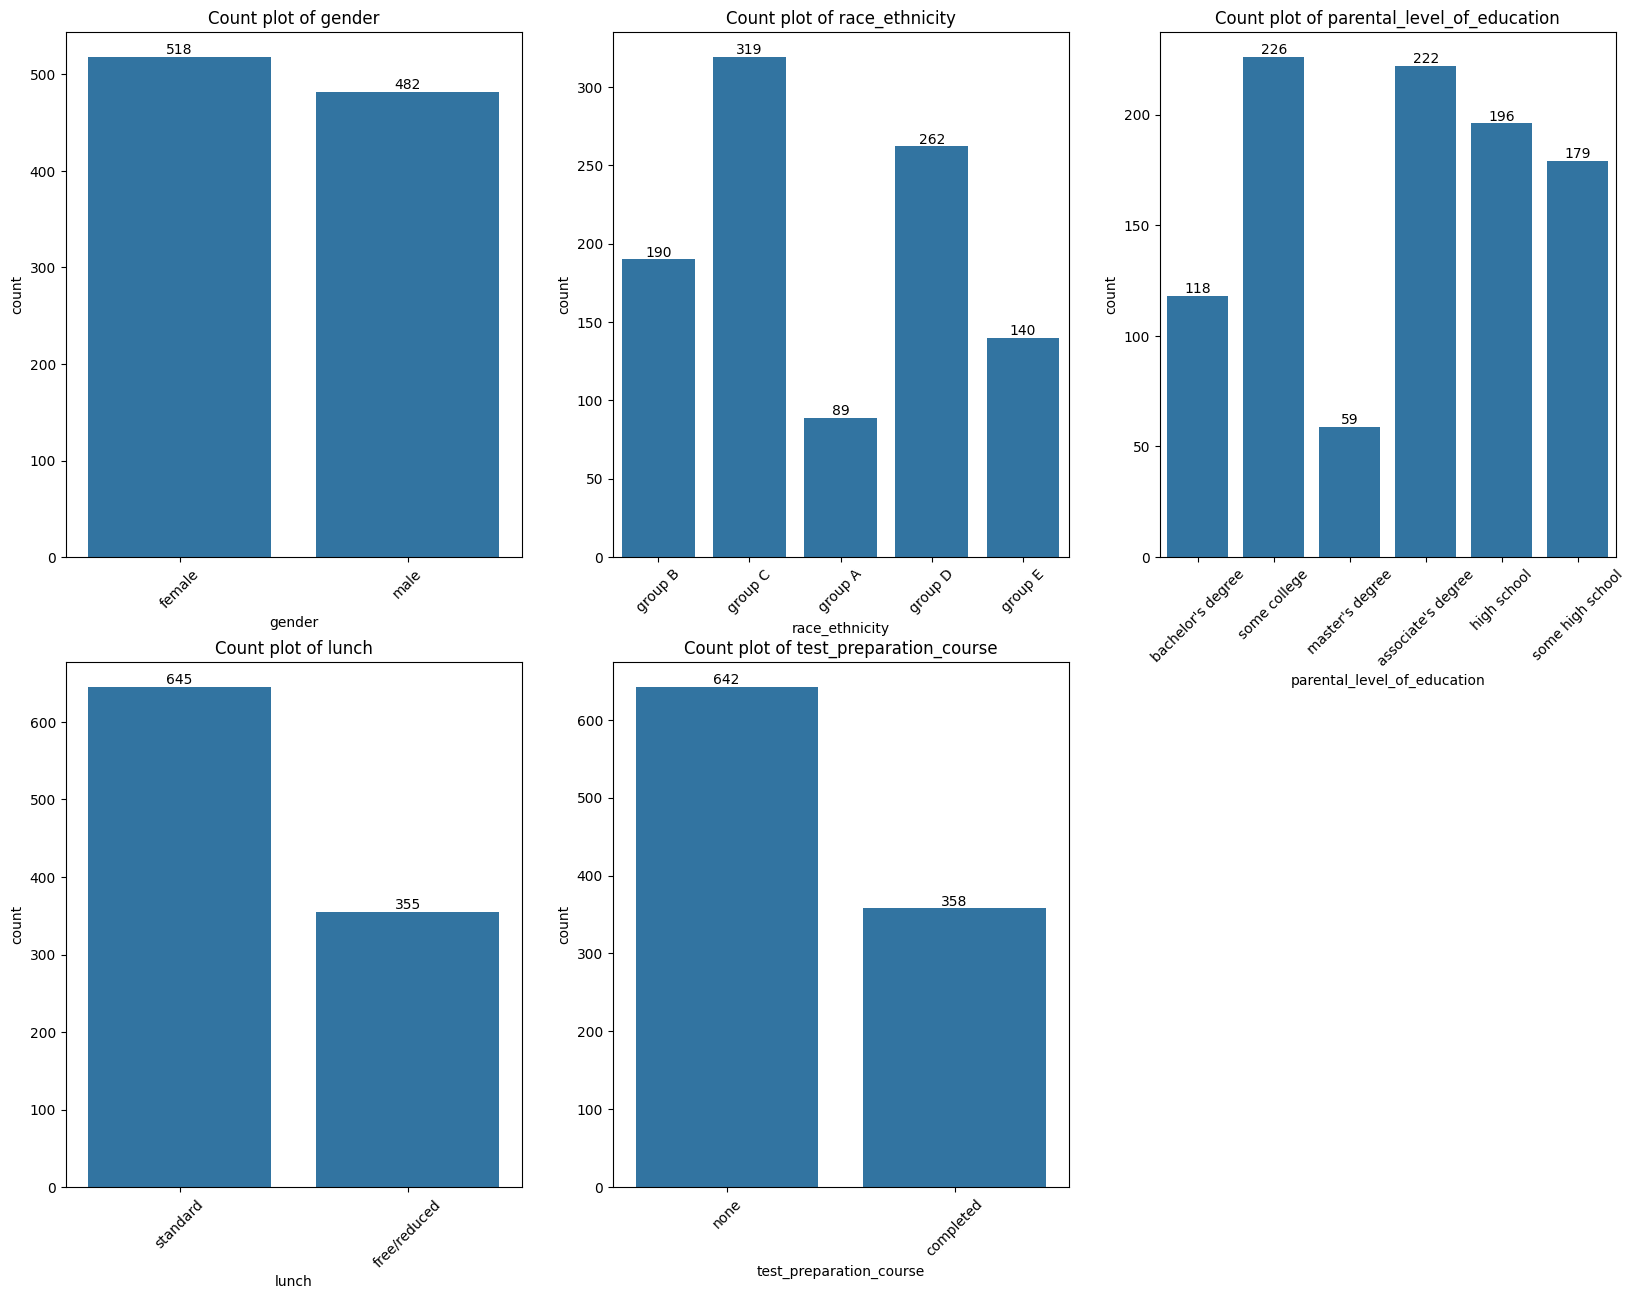

<Figure size 640x480 with 0 Axes>

In [22]:
column_no=len(categorical.columns)
plot=1
plt.figure(figsize=(20,15))
for i in categorical:
    if plot<=column_no:
        ax1=plt.subplot(2,3,plot)
        plt.title("Count plot of {}".format(i))
        plt.xticks(rotation=45)
        ax=sns.countplot(data=categorical,x=categorical[i])
        for j in ax.containers:
            ax.bar_label(j)
    plot+=1
plt.show()
plt.tight_layout()


Insights:count plot

    Students count is more in the category of not preparing for the test and those who have standard lunch.
    Race ethinicity of group A and parental level education who have masters are far lesser .


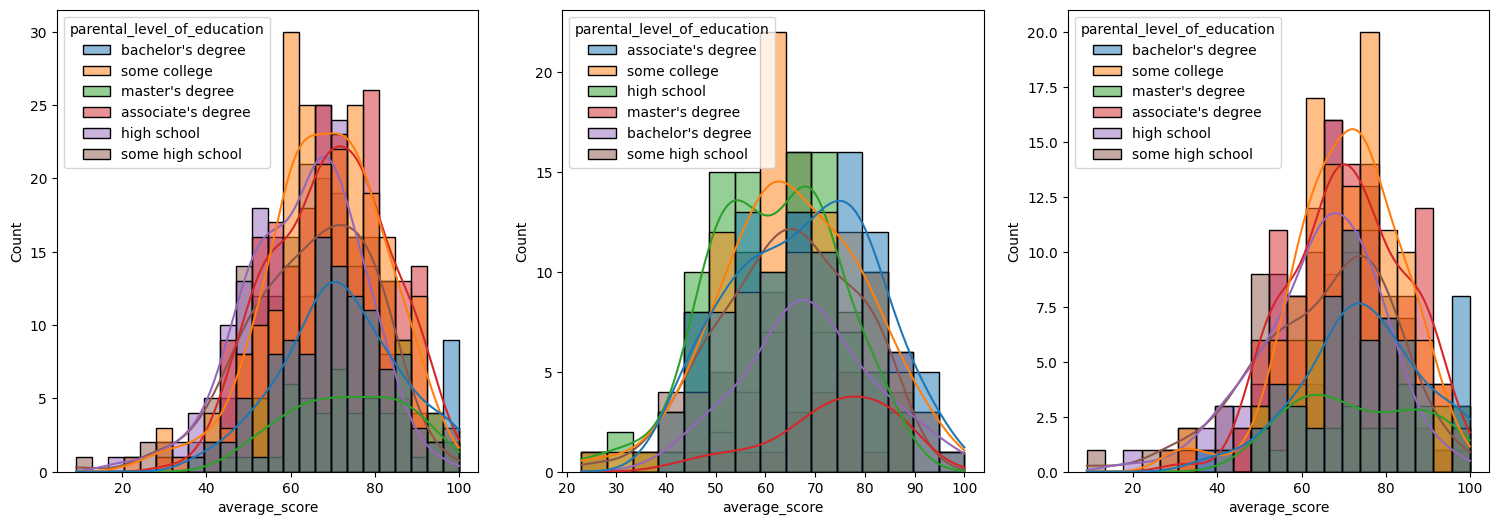

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

    In general parent's education don't help student perform well in exam.
    2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
    3rd plot we can see there is no effect of parent's education on female students.

In [24]:
numeric=pd.DataFrame(data[numeric_features])
numeric.head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


<Axes: >

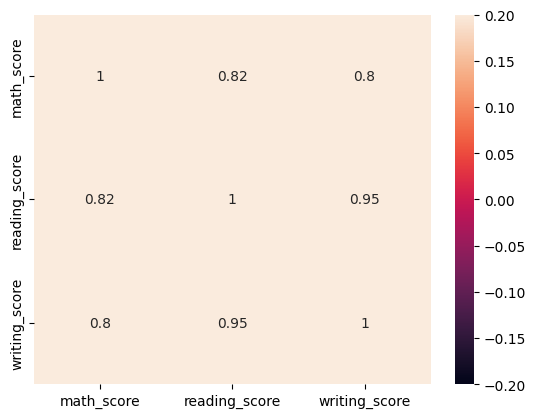

In [25]:
#finding out the correlation between the numeric features.
sns.heatmap(numeric.corr(),annot=True,vmin=-0.2,vmax=0.2)

we can see that writing score and reading score is highly correlated with a value of 0.95,so we can drop either of them while training the model.

<Axes: >

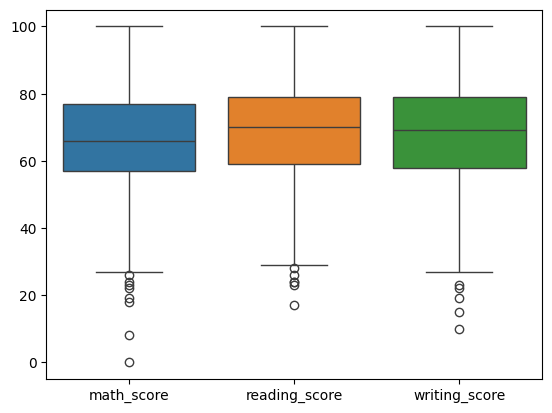

In [26]:
#checking the presence of outliers
sns.boxplot(data=data[['math_score','reading_score','writing_score']])

this shows that the score below 30 in each category is considered as outliers based on the student average.

<Axes: ylabel='average_score'>

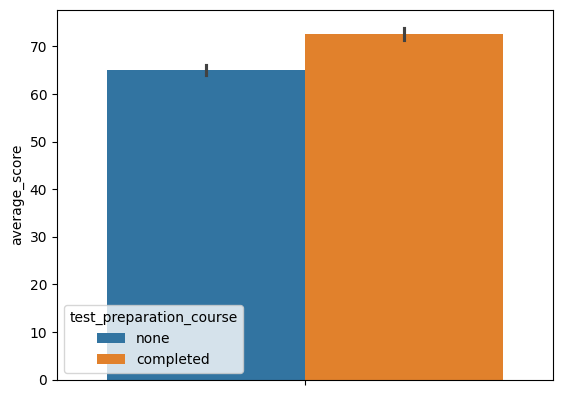

In [27]:
#the bar plot showing the effect of test preparation on average score.
sns.barplot(data=data,y='average_score',hue='test_preparation_course')

This shows that the test preparation has a mild effect on scores.

<Axes: ylabel='average_score'>

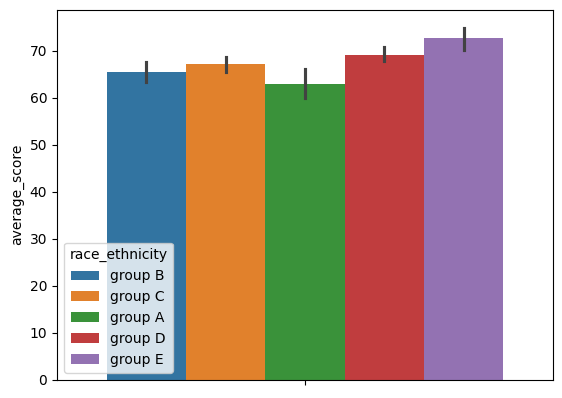

In [28]:
sns.barplot(data=data,y='average_score',hue='race_ethnicity')

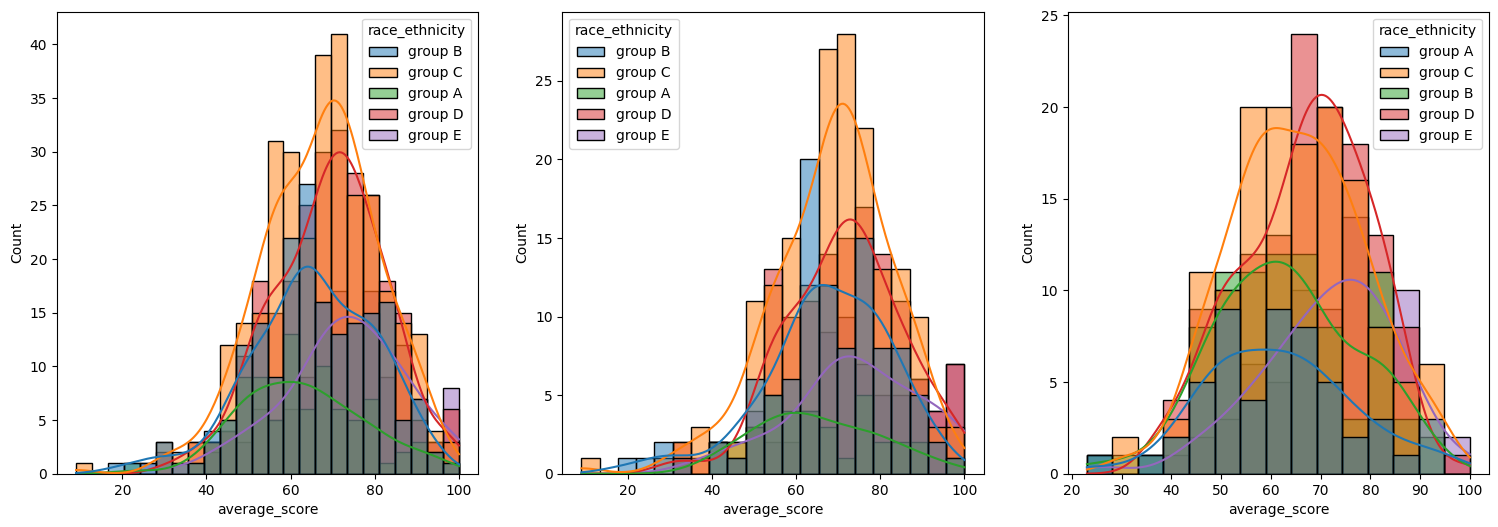

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

The above plot shows group A and B performed less.

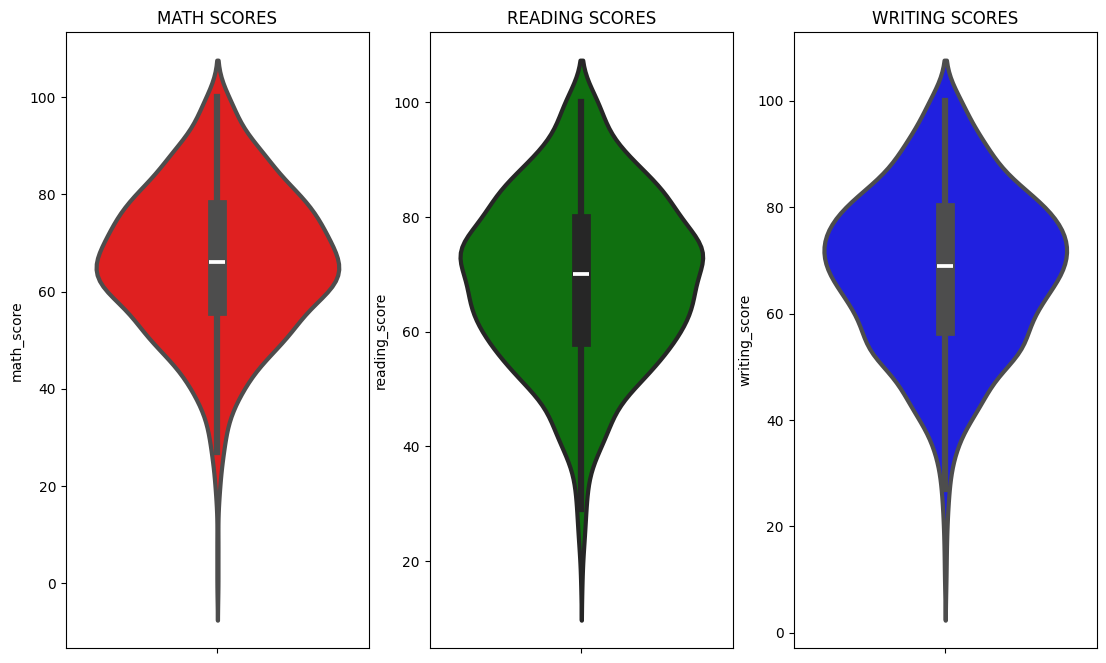

In [30]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=data,color='blue',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

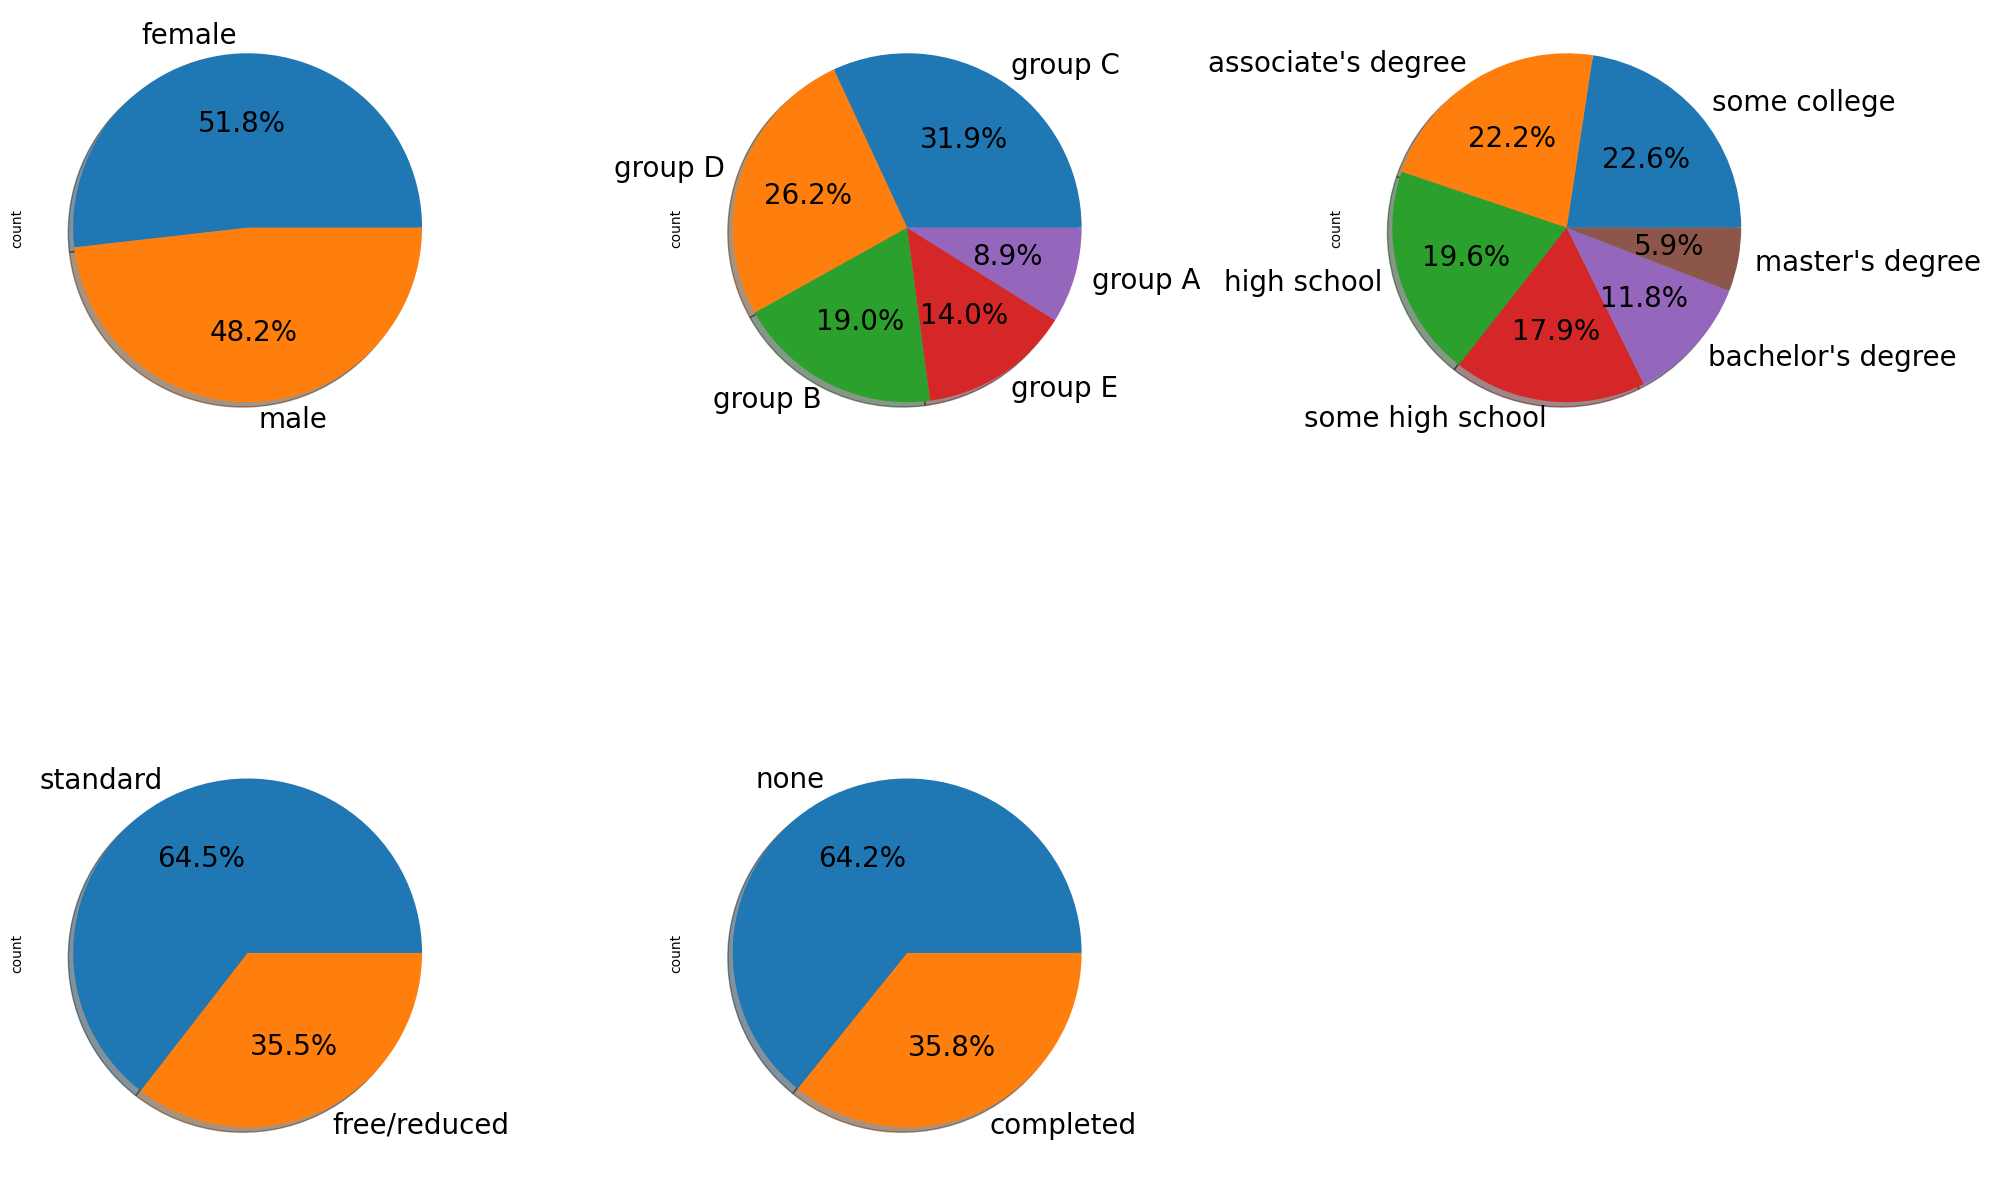

In [31]:
#Analysis using the pie plots for the categorical variables
plt.figure(figsize=(20,15))
pie_count=1
for i in categorical:
    if (pie_count<=len(categorical_features)):
        array=categorical[i].value_counts()
        label=categorical[i].value_counts().index
        
        plt.subplot(2,3,pie_count)
        
        array.plot(kind='pie',labels=label,autopct='%1.1f%%',fontsize=20,shadow=True)
    pie_count+=1
plt.tight_layout()
plt.show()

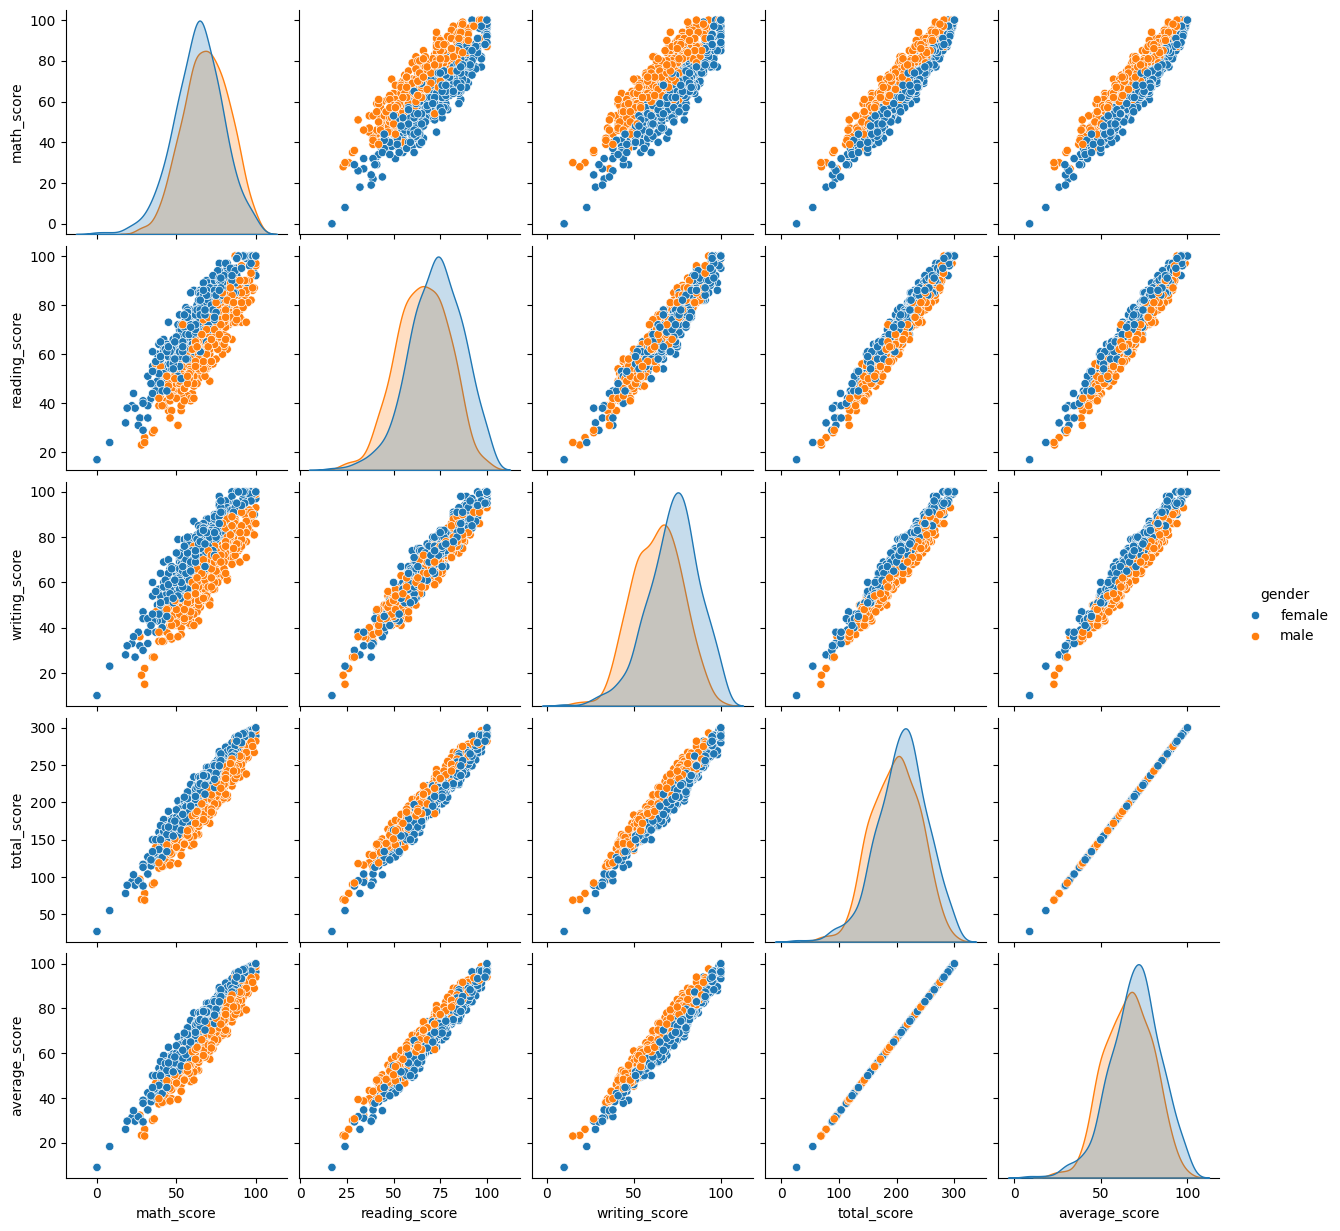

In [32]:
#pariplot
sns.pairplot(data,hue = 'gender')
plt.show()

The plot clearly shows that all the features are linearly related.